### Maxcut Runtime

### Setting Parameters 

In [13]:
min_qubits=4
max_qubits=4
max_circuits=1
num_shots=5000

degree = 3
rounds = 2
max_iter = 30
parameterized = False

max_execution_time = 100_000 # seconds

backend_id="ibmq_qasm_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = None

# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit_ibm_runtime import QiskitRuntimeService
# Another valid option for channel is "ibm_cloud"
# QiskitRuntimeService.save_account(channel="ibm_quantum", token="YOUR_API_TOKEN")

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"
# group="YOUR_GROUP_NAME"
# project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify the backend using a known "backend_id"
# # Use 'sabre' layout for IBM backends
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre' }
# backend_id="ibmq_belem"

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # *** Use these settings for better results
# min_qubits=4
# max_qubits=10
# max_circuits=2
# num_shots=50000

# For execution on Qiskit Runtime Service
from qiskit_ibm_runtime import QiskitRuntimeService
import runtime_utils

always_overwrite = False


### Check the Status of Any Previous Job

In [14]:
# Determine whether a job has been previously run in this folder. 
# If so, obtain the job_id and job status stored locally
job_id, job_status = runtime_utils.get_jobinfo(backend_id)
print(job_id)

do_execute = True

# if there is a prior job, get job from job_id (to be moved to runtime_utils)
if job_id != None:
    job = QiskitRuntimeService().job(job_id)
    print(job)
    print(job_status)
    
    if job_status == "RUNNING":
        print("... a RUNNING job was found, continuing to wait for completion.")
        do_execute = False
        
        # if running, ask for continue and wait, or abort?
        
        # if DONE and not always_overwrite, do you want to overwrite ? if true set execute=True
    

ccgagq2b5p7deggo96s0
<RuntimeJob('ccgagq2b5p7deggo96s0', 'qedc-maxcut-benchmark-16b1ebbd-4876-485f-9143-ea480a-ndyb2ODgbM')>
DONE


### Preparing Instances and Upload

In [7]:
if do_execute:

    # Creating runtime script to be uploaded
    RUNTIME_FILENAME = 'maxcut_runtime.py'
    runtime_utils.create_runtime_script(file_name=RUNTIME_FILENAME)

    # Read instance files into single dict to pass as runtime input
    insts = runtime_utils.prepare_instances()

    import uuid

    # Meta data required by qiskit runtime
    meta = {
        "name": f"qedc-maxcut-benchmark-{uuid.uuid4()}",
        "description": "A sample Maxcut Benchmark program.",
        "max_execution_time": 100_000,
        "version": "1.0",
    }

    service = QiskitRuntimeService()

    program_id = service.upload_program(data=RUNTIME_FILENAME, metadata=meta)

### Configuring Inputs and Execute

In [8]:
if do_execute:

    options = {
        'backend_name': backend_id
    }

    runtime_inputs = {
        "backend_id": backend_id,
        "method": 2,
        "_instances": insts,
        "min_qubits": min_qubits,
        "max_qubits": max_qubits,
        "max_circuits": max_circuits,
        "num_shots": num_shots,

        "degree": degree,
        "rounds": rounds,
        "max_iter": max_iter,
        "parameterized": parameterized,
        "do_fidelities": False,
        "score_metric": "approx_ratio",

        # To keep plots consistent
        "hub": hub,
        "group": group,
        "project": project
    }

    job = service.run(
        program_id=program_id,
        options=options,
        inputs=runtime_inputs,
        instance=f'{hub}/{group}/{project}'
    )

    runtime_utils.save_jobinfo(backend_id, job.job_id, "RUNNING")

    print(f'{job.creation_date.ctime() = }')
    print(f'{job.job_id = }')
    print(f'{job.program_id = }')

### Get result directly from job

In [10]:
# Get results
result = job.result()
runtime_utils.save_jobinfo(backend_id, job.job_id, "DONE")
print(result)

{'circuit_metrics': {'subtitle': 'Device = ibmq_qasm_simulator', '4': {'1': {'thetas_array': [0.831902464263522, 2.067954857921805, 0.41162756765646813, 0.5205516156393807], 'create_time': 0.0018167495727539062, 'rounds': 2, 'degree': 3, 'depth': 40, 'size': 52, 'xi': 0.5, 'tr_depth': 41, 'tr_size': 56, 'tr_xi': 0.46153846153846156, 'tr_n2q': 24, 'elapsed_time': 0.10109710693359375, 'exec_time': 0.030075788497924805, 'fidelity': 1.0, 'hf_fidelity': 1.0, 'opt_exec_time': 0.000396728515625, 'unique_sizes': [0, 3, 4], 'unique_counts': [199, 1841, 2960], 'cumul_counts': [199, 2040, 5000], 'approx_ratio': 0.86815, 'gibbs_ratio': 0.9012078386688412, 'bestCut_approx_ratio': 1.0, 'cvar_approx_ratio': 1.0, 'Max_N_approx_ratio': 1.0, 'quantile_optgaps': [0.25, 0.0, 0.0]}}}, 'circuit_metrics_final_iter': {'4': {'1': {'optimal_value': 4, 'unique_sizes': [0, 3, 4], 'unique_counts': [199, 1841, 2960], 'cumul_counts': [199, 2040, 5000], 'converged_thetas_list': [0.831902464263522, 2.067954857921805, 

### Save results to file

In [11]:
import maxcut_benchmark
maxcut_benchmark.save_runtime_data(result)

### Plot

... execution starting at Sep 13, 2022 20:15:47 UTC
Loading from width_4_restartInd_1.json, corresponding to 4 qubits and restart index 1
************
Average Depth, ξ (xi) for the 4 qubit group = 40, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 41, 0.462, 24.0
Average Creation Time for the 4 qubit group = 0.002 secs
Average Elapsed Time for the 4 qubit group = 0.101 secs
Average Execution Time for the 4 qubit group = 0.03 secs
Average Fidelity for the 4 qubit group = 1.0
Average Hellinger Fidelity for the 4 qubit group = 1.0



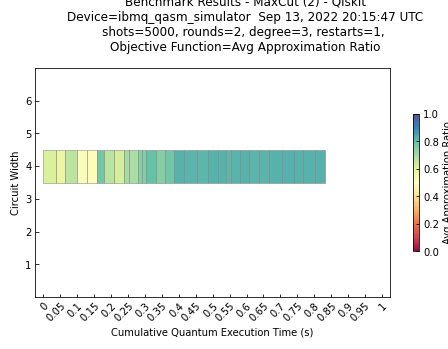

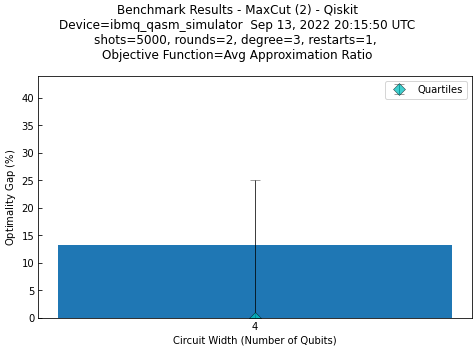

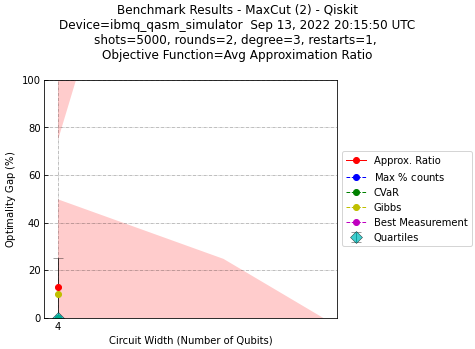

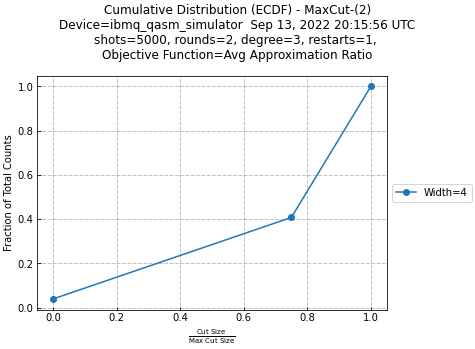

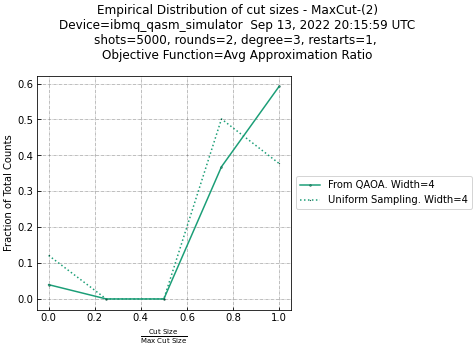

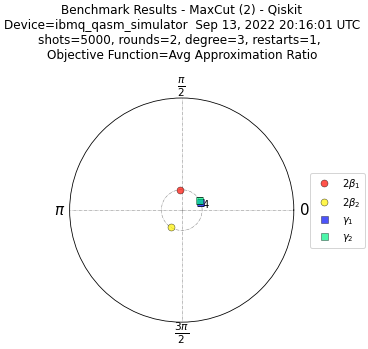

In [12]:
import os, maxcut_benchmark
#maxcut_benchmark.load_data_and_plot('__data')
maxcut_benchmark.load_data_and_plot(os.path.join('__data', backend_id))